# Tensorflow Regression

## Libraries

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.2f}'.format # Format


## Data 


In [9]:
# URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
# Data
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
df = raw_dataset.copy()

# Replace Nulls
for i in [i for i in df.columns if df.dtypes[i]!='object']:
    df[i].fillna(value=round(df[i].mean(),0), inplace=True)

for i in [i for i in df.columns if df.dtypes[i]=='object']:
    df[i].fillna(value="Other", inplace=True)

# Get Dummies
pd.get_dummies(df).astype(int)
X = df.drop('MPG',axis = 1).copy()
y = df['MPG'].copy()

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## Model

In [10]:
callback = tf.keras.callbacks.EarlyStopping(
                                             monitor='loss',  
                                             patience=20,
                                             min_delta=0.01 
                                           )
m,n = X.shape 

NNModel = tf.keras.Sequential([
                                  tf.keras.layers.InputLayer(input_shape=(n,)),
                                  tf.keras.layers.Dense(64 , activation = "relu" 
            #                                              ,kernel_regularizer='l2'
                                                        ),
                                  tf.keras.layers.Dense(64 ,activation = "relu"    
            #                                           ,kernel_regularizer='l2'
                                                       ),
                                  tf.keras.layers.Dense(1
            #                                           ,activation = "linear"  
                                                       ) 
                              ])
    

NNModel.compile(
                 optimizer=keras.optimizers.Adam(learning_rate=0.01),
                 loss='mae'
#                metrics=['accuracy']
               )


history = NNModel.fit(
                       X_train, 
                       y_train, 
                       epochs=1000,
                       verbose  = 1,
                       callbacks=[callback],
                       validation_data=(X_test, y_test)
                     )


Epoch 1/1000
10/10 [==============================] - 1s 20ms/step - loss: 139.6081 - val_loss: 66.1485
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 39.2751 - val_loss: 19.7952
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 16.3995 - val_loss: 10.8173
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 15.4861 - val_loss: 9.4771
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 9.5167 - val_loss: 8.0585
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 13.1843 - val_loss: 19.5495
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 16.6235 - val_loss: 6.1002
Epoch 8/1000
10/10 [==============================] - 0s 9ms/step - loss: 15.8533 - val_loss: 32.9381
Epoch 9/1000
10/10 [==============================] - 0s 7ms/step - loss: 21.0246 - val_loss: 20.0323
Epoch 10/1000
10/10 [==============================] - 0s 6ms/step - loss: 19.0208 -

Epoch 82/1000
10/10 [==============================] - 0s 8ms/step - loss: 2.6646 - val_loss: 2.9732
Epoch 83/1000
10/10 [==============================] - 0s 6ms/step - loss: 2.5237 - val_loss: 2.7267
Epoch 84/1000
10/10 [==============================] - 0s 7ms/step - loss: 2.6171 - val_loss: 2.8398
Epoch 85/1000
10/10 [==============================] - 0s 7ms/step - loss: 2.6975 - val_loss: 3.3551
Epoch 86/1000
10/10 [==============================] - 0s 7ms/step - loss: 2.5581 - val_loss: 2.9342
Epoch 87/1000
10/10 [==============================] - 0s 6ms/step - loss: 2.4519 - val_loss: 2.6943
Epoch 88/1000
10/10 [==============================] - 0s 6ms/step - loss: 2.4101 - val_loss: 2.8614
Epoch 89/1000
10/10 [==============================] - 0s 6ms/step - loss: 2.3645 - val_loss: 2.5886
Epoch 90/1000
10/10 [==============================] - 0s 6ms/step - loss: 2.7749 - val_loss: 2.5228
Epoch 91/1000
10/10 [==============================] - 0s 7ms/step - loss: 2.7560 - val_los

In [ ]:
test_loss = NNModel.evaluate(X_test, y_test)

<AxesSubplot: >

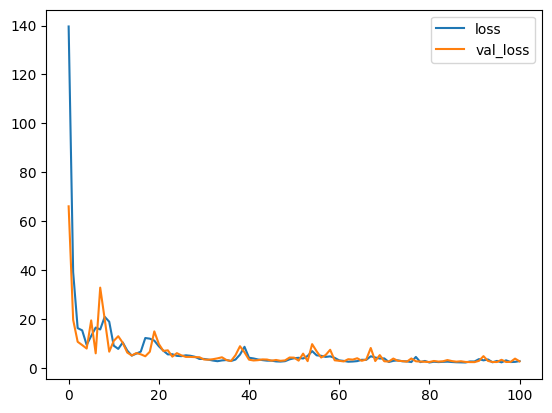

In [11]:
pd.DataFrame(history.history).plot()

In [12]:
NNModel.layers[0].get_weights()[0][0]

array([-0.47714585, -0.04827227, -0.26629904, -0.39878523, -0.00519939,
       -0.30789453, -0.02354902, -0.46538034,  0.05811539, -0.33031827,
        0.00941259, -0.2051172 ,  0.21675071, -0.04426713, -0.06754571,
       -0.02431369,  0.1486257 ,  0.46223447,  0.04081121, -0.3499777 ,
       -0.06057453, -0.2410346 , -0.14492214, -0.28740054, -0.39387769,
       -0.02362525, -0.24248564,  0.09335738,  0.10221682, -0.10395848,
       -0.03382136, -0.43367305, -0.11205716, -0.17331693, -0.23751734,
       -0.22441463, -0.02038869, -0.17374445,  0.22497566, -0.4088039 ,
        0.26788476,  0.17989776, -0.23076135,  0.1749247 ,  0.16345431,
       -0.30439797,  0.09434032, -0.11671901, -0.08876215,  0.24783102,
       -0.15204747, -0.17087367,  0.04724773,  0.01701549,  0.17447758,
       -0.0653419 , -0.18921486,  0.22477433, -0.2929653 , -0.08874393,
        0.07590044,  0.15594074,  0.22562471, -0.14857449], dtype=float32)

In [17]:
# Test New Data and Predict
# test_features = np.array([[4, 97,88, 2130, 14.5, 71, 1]])  
test_predictions = NNModel.predict(X_test)



3/3 [==============================] - 0s 3ms/step
